# 다항회귀
- 데이터가 단순히 직선의 형태가 아닌 비선형의 형태를 가지고 있는 경우, 각 변수의 거듭 제곱을 새로운 변수로 추가하면 선형의 모델로 사용 가능 
- 이렇게 확장된 특성을 데이터셋에 선형 모델로 훈련시키는 방법 

In [ ]:
import pandas as pd

In [ ]:
cereal = pd.read_csv("../data/cereal.csv")

In [ ]:
cereal.info()

In [ ]:
cereal.head()

In [ ]:
# 문자형 데이터를 제외
cereal = cereal.iloc[:, 3:]
cereal.head(1)

In [ ]:
# 설탕의 함유량에 따른 영양등급 평가에 대한 회귀 
cereal.describe()

In [ ]:
# sugar에서 최솟값이 음수가 보인다. -> 음수인 데이터의 개수를 확인
# sugars의 데이터가 음수인 조건식 생성 
(cereal['sugars'] < 0).sum()

flag = cereal['sugars'] < 0

cereal.loc[flag, ]

In [ ]:
# drop() 함수를 이용하여 특정 인덱스를 제거
cereal.drop(57, axis=0)

In [14]:
# 음수 조건식에 부정 : 비트연산자를 이용하여 부정 처리 
cereal = cereal.loc[~flag, ]

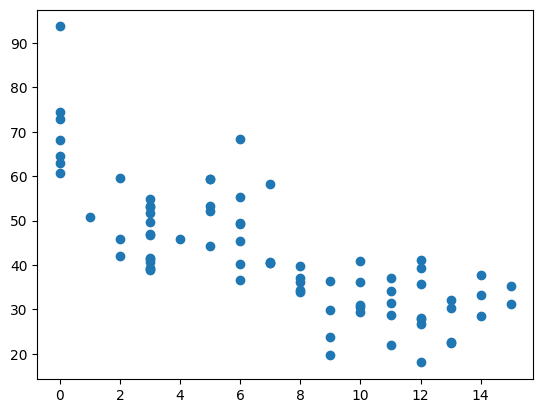

In [15]:
# scatter 그래프를 이용하여 데이터의 분포를 확인 
import matplotlib.pyplot as plt 
x = cereal['sugars']
y = cereal['rating']

plt.scatter(x, y)

plt.show()

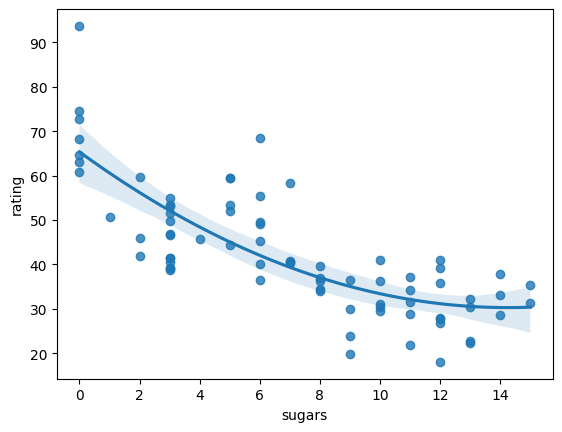

In [19]:
# 산점도 그래프 회귀선을 추가하여 그래프 생성 
import seaborn as sns

sns.regplot(data = cereal, x='sugars', y='rating', order=2)

plt.show()

In [20]:
# sugars, rating 두개의 컬럼을 이용하여 선형회귀 모델 학습 
cereal2 = cereal[['sugars', 'rating']]

In [29]:
x = cereal2['sugars'].values
y = cereal2['rating'].values

In [ ]:
# 행렬구조를 변경
x.reshape(-1, 1)

In [23]:
# train,test로 나눠준다. 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

lr.fit(X_train.reshape(-1, 1), Y_train)

pred_1 = lr.predict(X_test.reshape(-1 , 1))

mae_1 = mean_absolute_error(Y_test, pred_1)

print(round(mae_1, 4))

7.8443


In [ ]:
# n차원 다항 조건 생성
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# PolynomialFeatuares class 생성 
# degree : 차수 지정
poly_reg = PolynomialFeatures(degree=2)

# poly_reg에 범위 지정하고 데이터를 변환하여 되돌려준다. 
X_train_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))

# 단순 선형 회귀 모델을 생성
lr = LinearRegression()

lr.fit(X_train_poly, Y_train)

pred_2 = lr.predict(X_test_poly)

mae_2 = mean_absolute_error(Y_test, pred_2)

In [38]:
print(round(mae_2, 4))

7.1364
